In [1]:
import re
import json
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Set iPython to display visualization inline
%matplotlib inline

In [2]:
f_orig = open('../data/twitter_zika_data_20160705.txt','r')
f_new = open('../data/twitter_zika_data_20160705copytmp.txt', 'w')

for line in f_orig:
    p = re.compile('(Ok, this is actually running)')
    s = p.sub(' ', line)
    f_new.write(s)

f_orig.close()
f_new.close()

print("finished")

finished


In [7]:
f_orig = open('../data/twitter_zika_data_20160705copytmp.txt','r')
f_new = open('../data/twitter_zika_data_20160705edited.txt', 'w')

for line in f_orig:
    p = re.compile('\(\'zika\', u\'{')
    s = p.sub(' {', line)
    f_new.write(s)

f_orig.close()
f_new.close()

print("finished")

finished


In [9]:
f_orig = open('../data/twitter_zika_data_20160705edited.txt','r')
f_new = open('../data/twitter_zika_data_20160705final.txt', 'w')

for line in f_orig:
    p = re.compile('}\\r\\n\'\)')
    s = p.sub('} ', line)
    f_new.write(s)

f_orig.close()
f_new.close()

print("finished")

finished


# Below is a test for opening a .json file

In [13]:
tweets_data_file1 = '../data/a_test_twitter_fullData.json'
tweets_data = json.loads(open(tweets_data_file1).read())
print("This document contains %d tweets.\n" %(len(tweets_data)))
type(tweets_data)
print(tweets_data)

This document contains 27 tweets.

{'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'favorite_count': 0, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'favorited': False, 'text': 'GOP says we can have some $ to fight Zika virus...IF we allow the Confederate flag to fly. https://t.co/HM8bzqHSmw https://t.co/5GqqpFGfzi', 'id': 748548476993044480, 'filter_level': 'low', 'timestamp_ms': '1467302838930', 'in_reply_to_status_id': None, 'entities': {'urls': [{'expanded_url': 'http://wonkette.com/603529/republicans-poison-zika-funding-bill-with-important-help-for-confederate-flag-cuts-to-obamacare#CIYRqoT3xcq0bhHs.99', 'indices': [91, 114], 'url': 'https://t.co/HM8bzqHSmw', 'display_url': 'wonkette.com/603529/republi…'}], 'user_mentions': [], 'media': [{'id': 748548278086569985, 'id_str': '748548278086569985', 'sizes': {'medium': {'resize': 'fit', 'h': 308, 'w': 477}, 'large': {'resize': 'fit', 'h': 308, 'w': 477}

In [2]:
tweets_data_path = '../data/twitter_data_zika.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")


for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        pass 

print("This document contains %d tweets.\n" %(len(tweets_data)))

print("The keys for the tweet are: \n")
test_tweet = tweets_data[0]
print("\n".join(test_tweet.keys()))


This document contains 11939 tweets.

The keys for the tweet are: 

id_str
in_reply_to_user_id_str
place
timestamp_ms
contributors
quoted_status
source
filter_level
quoted_status_id_str
possibly_sensitive
text
in_reply_to_status_id
retweeted
quoted_status_id
in_reply_to_user_id
retweet_count
favorited
is_quote_status
coordinates
lang
geo
entities
in_reply_to_status_id_str
in_reply_to_screen_name
truncated
id
favorite_count
user
created_at


In [3]:
tweets_LatLon_DF = pd.DataFrame()

for idx in range(1,len(tweets_data)+1):
    try:
        rowTmp = tweets_data[idx]
        t = rowTmp['text']
        l = rowTmp['lang']
        lats = rowTmp['geo']['coordinates'][0]
        lons = rowTmp['geo']['coordinates'][1]
        tmp = pd.DataFrame({'text': t, 'lang': l, 'lats': lats, 'lons': lons}, index=[idx])
        tweets_LatLon_DF = pd.concat([tweets_LatLon_DF, tmp])
    except:
        pass
    
print(len(tweets_LatLon_DF))
# print(tweets_LatLon_DF)

59


In [4]:
tweets_Language_DF = pd.DataFrame()

for idx in range(1,len(tweets_data)+1):
    try:
        rowTmp = tweets_data[idx]
        t = rowTmp['text']
        l = rowTmp['lang']
        tmp = pd.DataFrame({'text': t, 'lang': l}, index=[idx])
        tweets_Language_DF = pd.concat([tweets_Language_DF, tmp])
    except:
        pass
    
print(len(tweets_Language_DF))

11937


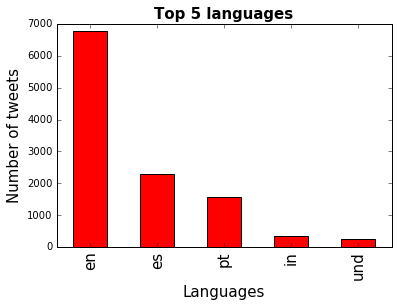

In [5]:
tweets_by_lang = tweets_Language_DF['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

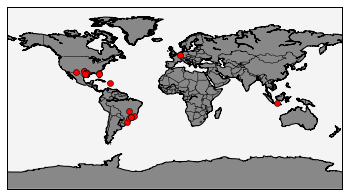

In [6]:
# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='gall', 
              # with low resolution,
              resolution = 'l', 
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(tweets_LatLon_DF['lons'].values, tweets_LatLon_DF['lats'].values)

# Plot them using round markers of size 6
map.plot(x, y, 'ro', markersize=6)

# Show the map
plt.show()

In [35]:
test_tweet2 = tweets_data[3957]
pl1 = test_tweet2['place']['full_name']
print(pl1)

Houston, TX


In [53]:
tweets_place_DF = pd.DataFrame()

for idx in range(1,len(tweets_data)+1):
    try:
        rowTmp = tweets_data[idx]
        t = rowTmp['text']
        l = rowTmp['lang']
        place = rowTmp['place']['full_name']
        
        tmp = pd.DataFrame({'text': t, 'lang': l, 'place': place}, index=[idx])
        tweets_place_DF = pd.concat([tweets_place_DF, tmp])
    except:
        pass
    
print(len(tweets_place_DF))
# print(tweets_LatLon_DF)

302


In [34]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode(test_tweet2['place']['full_name'])
print(location)
print((location.latitude, location.longitude))

Houston, Harris County, Texas, United States of America
(29.7589382, -95.3676973)


In [62]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

tweets_place_wLatLon_DF = pd.DataFrame()

for idx in range(1,len(tweets_data)+1):
    try:
        rowTmp = tweets_data[idx]
        l = rowTmp['lang']
        place = rowTmp['place']['full_name']
        placeGeo = geolocator.geocode(place)
        lats1 = placeGeo.latitude
        lons1 = placeGeo.longitude
        tmp = pd.DataFrame({'lang': l, 'place': place, 'lats': lats1, 'lons': lons1}, index=[idx])        
        tweets_place_wLatLon_DF = pd.concat([tweets_place_wLatLon_DF, tmp])
    except:
        pass
    
print(len(tweets_place_wLatLon_DF))
# print(tweets_LatLon_DF)

299


In [67]:
tweets_LatLon_full_DF = pd.DataFrame()

tweets_LatLon_full_DF = pd.concat([tweets_place_wLatLon_DF, tweets_LatLon_DF])

print('DF from direct Lat Lon has %d entries, and DF with Lat Lon from Place Names has %d entries'  %(len(tweets_LatLon_DF), len(tweets_place_wLatLon_DF)))
print('Therefore, the full Lat Lon DataFrame has %d entries' %(len(tweets_LatLon_full_DF)))

DF from direct Lat Lon has 59 entries, and DF with Lat Lon from Place Names has 299 entries
Therefore, the full Lat Lon DataFrame has 358 entries


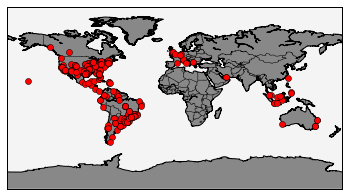

In [69]:
# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='gall', 
              # with low resolution,
              resolution = 'l', 
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(tweets_LatLon_full_DF['lons'].values, tweets_LatLon_full_DF['lats'].values)

# Plot them using round markers of size 6
map.plot(x, y, 'ro', markersize=6)

# Show the map
plt.show()